# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [1]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib

Executing: /tmp/apt-key-gpghome.cD2LkhHdS2/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates In

# Now we can use graph-tool as any other Python module



In [0]:
from graph_tool.all import *

g = collection.data["celegansneural"]
state = minimize_nested_blockmodel_dl(g)

# Inline drawing works too!

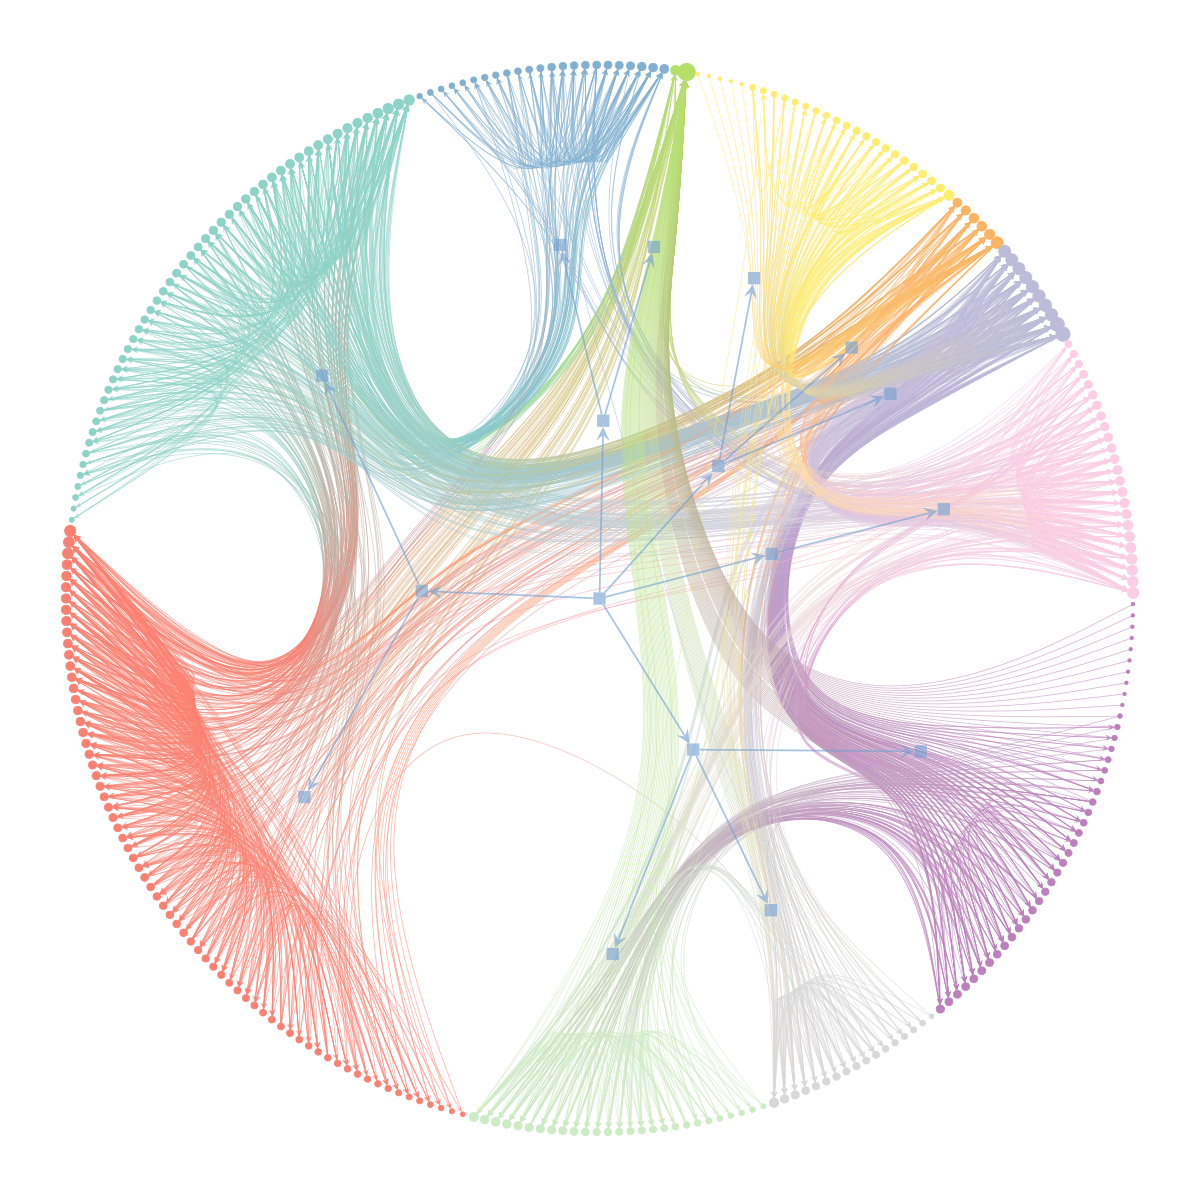

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd11ed04ef0, at 0x7fd0ff2debe0>,
 <Graph object, directed, with 314 vertices and 313 edges, at 0x7fd11dbc1ef0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd11dbc1ef0, at 0x7fd13b958828>)

In [3]:

state.draw()

In [0]:
pip install -q kaggle

In [6]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mishkinkhunger","key":"fc246653201e69946a97375140429286"}'}

In [0]:
cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d stackoverflow/stacksample

100% 1.10G/1.11G [00:24<00:00, 41.1MB/s]
100% 1.11G/1.11G [00:24<00:00, 49.4MB/s]


In [11]:

!unzip stacksample.zip

Archive:  stacksample.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [0]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os,sys,argparse
import matplotlib.pyplot as plt
from collections import Counter,defaultdict
import pickle
import graph_tool.all as gt
import graph_tool.all
import re 
import nltk # for text preprocessing
import gensim
import re, nltk, spacy, gensim



In [0]:
question_df = pd.read_csv("Questions.csv",encoding='latin1')
tags_df = pd.read_csv("Tags.csv",encoding='latin1')




In [14]:
question_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [15]:
question_df.shape

(1264216, 7)

In [16]:
modified_question_df = question_df.drop(['Score','CreationDate','OwnerUserId','Id'],axis = 1)
modified_question_df.head()



,ClosedDate,Title,Body
0,NaN,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,2012-12-26T03:45:49Z,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,NaN,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,NaN,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,NaN,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [0]:
number_of_questions = 10000

In [0]:
titles = modified_question_df.Title[:number_of_questions]
questions = modified_question_df.Body[:number_of_questions]

In [19]:
import string

def display_visible_html_using_re(text):             
    return (re.sub("(\<.*?\>)", "",text))

def remove_punctuation(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

questions = [normalize_text(question) for question in questions]
titles = [remove_punctuation(title) for title in titles]
questions = [remove_punctuation(question) for question in questions]

questionsl = []
questionsl.append(questions)
#print(titles)
print(questions[:10])



['Ive written a database generation script in SQL and want to execute it in my Adobe AIR applicationI execute this in Adobe AIR using the following methodsNo errors are generated however only tRole exists It seems that it only looks at the first query up to the semicolon if I remove it the query fails Is there a way to call multiple queries in one statement', 'Are there any really good tutorials explaining branching and merging with Apache Subversion All the better if its specific to TortoiseSVN client', 'Has anyone got experience creating SQLbased ASPNET sitemap providersIve got the default XML file websitemap working properly with my Menu and SiteMapPath controls but Ill need a way for the users of my site to create and modify pages dynamicallyI need to tie page viewing permissions into the standard ASPNET membership system as well', 'This is something Ive pseudosolved many times and never quite found a solution Thats stuck with me The problem is to come up with a way to generate N c

In [20]:
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
#break body and title into tokens
questions_tokens = [nltk.word_tokenize(question) for question in questions]
titles_tokens = [nltk.word_tokenize(title) for title in titles]

print(questions_tokens)
print(titles_tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
#getting the root word
stemmer = nltk.stem.PorterStemmer()
questions_stemmed = [[stemmer.stem(token) for token in tokens] for tokens in questions_tokens]
titles_stemmed = [[stemmer.stem(token) for token in tokens] for tokens in titles_tokens]

# questions_stemmed

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
#removing stopwords from body and titles
english_stopwords = set([word for word in nltk.corpus.stopwords.words("english")])
questions_stemmed = [[token for token in tokens if token not in english_stopwords] for tokens in questions_stemmed]
titles_stemmed = [[token for token in tokens if token not in english_stopwords] for tokens in titles_stemmed]

print(questions_stemmed)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
word_counts = pd.Series(np.concatenate(questions_stemmed)).value_counts()
singular_words = set(word_counts[pd.Series(np.concatenate(questions_stemmed)).value_counts() == 1].index)
questions_stemmed = [[word for word in title if word not in singular_words] for title in questions_stemmed]

word_counts = pd.Series(np.concatenate(titles_stemmed)).value_counts()
singular_words = set(word_counts[pd.Series(np.concatenate(titles_stemmed)).value_counts() == 1].index)
titles_stemmed = [[word for word in title if word not in singular_words] for title in titles_stemmed]


# questions_stemmed

In [0]:
non_empty_indices = [i for i in range(len(questions_stemmed)) if len(questions_stemmed[i]) > 0]
questions_stemmed = np.asarray(questions_stemmed)[non_empty_indices]
non_empty_indices = [i for i in range(len(titles_stemmed)) if len(titles_stemmed[i]) > 0]
titles_stemmed = np.asarray(titles_stemmed)[non_empty_indices]


# questions_stemmed

In [0]:
# titles = [h.split()[0] for h in questions]
# titles

In [30]:

dictionary = gensim.corpora.Dictionary(questions_stemmed)
dictionary2 = gensim.corpora.Dictionary(titles_stemmed)

# print(len(dictionary2)) #620
# print(len(dictionary)) #3194

print(dictionary2)

Dictionary(2977 unique tokens: ['multipl', 'one', 'queri', 'statement', 'branch']...)


In [0]:
corpus = [dictionary.doc2bow(text) for text in questions_stemmed]
corpus2 = [dictionary2.doc2bow(text) for text in titles_stemmed]




selecting questions with scores above 5

In [0]:

class sbmtm():
    '''
    Class for topic-modeling with sbm's.
    '''

    def __init__(self):
        self.g = None ## network

        self.words = [] ## list of word nodes
        self.documents = [] ## list of document nodes

        self.state = None ## inference state from graphtool
        self.groups = {} ## results of group membership from inference
        self.mdl = np.nan ## minimum description length of inferred state
        self.L = np.nan ## number of levels in hierarchy

    def make_graph(self,list_texts, documents = None, counts=True, n_min = None):
        '''
        Load a corpus and generate the word-document network

        optional arguments:
        - documents: list of str, titles of documents
        - counts: save edge-multiplicity as counts (default: True)
        - n_min, int: filter all word-nodes with less than n_min counts (default None)
        '''
        D = len(list_texts)

        ## if there are no document titles, we assign integers 0,...,D-1
        ## otherwise we use supplied titles
        if documents == None:
            list_titles = [str(h) for h in range(D)]
        else:
            list_titles = documents

        ## make a graph
        ## create a graph
        g = gt.Graph(directed=False)
        ## define node properties
        ## name: docs - title, words - 'word'
        ## kind: docs - 0, words - 1
        name = g.vp["name"] = g.new_vp("string")
        kind = g.vp["kind"] = g.new_vp("int")
        if counts:
            ecount = g.ep["count"] = g.new_ep("int")

        docs_add = defaultdict(lambda: g.add_vertex())
        words_add = defaultdict(lambda: g.add_vertex())

        ## add all documents first
        for i_d in range(D):
            title = list_titles[i_d]
            d=docs_add[title]

        ## add all documents and words as nodes
        ## add all tokens as links
        for i_d in range(D):
            title = list_titles[i_d]
            text = list_texts[i_d]

            d=docs_add[title]
            name[d] = title
            kind[d] = 0
            c=Counter(text)
            for word,count in c.items():
                w=words_add[word]
                name[w] = word
                kind[w] = 1
                if counts:
                    e = g.add_edge(d, w)
                    ecount[e] = count
                else:
                    for n in range(count):
                        g.add_edge(d,w)

        ## filter word-types with less than n_min counts
        if n_min is not None:
            v_n = g.new_vertex_property("int")
            for v in g.vertices():
                v_n[v] = v.out_degree()

            v_filter =  g.new_vertex_property("bool")
            for v in g.vertices():
                if v_n[v] < n_min and g.vp['kind'][v]==1:
                    v_filter[v] = False
                else:
                    v_filter[v] = True
            g.set_vertex_filter(v_filter)
            g.purge_vertices()
            g.clear_filters()


        self.g = g
        self.words = [ g.vp['name'][v] for v in  g.vertices() if g.vp['kind'][v]==1   ]
        self.documents = [ g.vp['name'][v] for v in  g.vertices() if g.vp['kind'][v]==0   ]

    def make_graph_from_BoW_df(self, df, counts=True, n_min=None):
        """
        Load a graph from a Bag of Words DataFrame

        arguments
        -----------
        df should be a DataFrame with where df.index is a list of words and df.columns a list of documents

        optional arguments:
        - counts: save edge-multiplicity as counts (default: True)
        - n_min, int: filter all word-nodes with less than n_min counts (default None)

        :type df: DataFrame
        """
        # make a graph
        g = gt.Graph(directed=False)
        ## define node properties
        ## name: docs - title, words - 'word'
        ## kind: docs - 0, words - 1
        name = g.vp["name"] = g.new_vp("string")
        kind = g.vp["kind"] = g.new_vp("int")
        if counts:
            ecount = g.ep["count"] = g.new_ep("int")

        X = df.values

        # add all documents and words as nodes
        # add all tokens as links
        X = scipy.sparse.coo_matrix(X)

        if not counts and X.dtype != int:
            X_int = X.astype(int)
            if not np.allclose(X.data, X_int.data):
                raise ValueError('Data must be integer if '
                                 'weighted_edges=False')
            X = X_int

        docs_add = defaultdict(lambda: g.add_vertex())
        words_add = defaultdict(lambda: g.add_vertex())

        D = len(df.columns)
        ## add all documents first
        for i_d in range(D):
            title = df.columns[i_d]
            d = docs_add[title]
            name[d] = title
            kind[d] = 0

        ## add all words
        for i_d in range(len(df.index)):
            word = df.index[i_d]
            w = words_add[word]
            name[w] = word
            kind[w] = 1

        ## add all documents and words as nodes
        ## add all tokens as links
        for i_d in range(D):
            title = df.columns[i_d]
            text = df[title]
            for i_w, word, count in zip(range(len(df.index)), df.index, text):
                if count < 1:
                    continue
                if counts:
                    e = g.add_edge(i_d, D + i_w)
                    ecount[e] = count
                else:
                    for n in range(count):
                        g.add_edge(i_d, D + i_w)

        ## filter word-types with less than n_min counts
        if n_min is not None:
            v_n = g.new_vertex_property("int")
            for v in g.vertices():
                v_n[v] = v.out_degree()

            v_filter = g.new_vertex_property("bool")
            for v in g.vertices():
                if v_n[v] < n_min and g.vp['kind'][v] == 1:
                    v_filter[v] = False
                else:
                    v_filter[v] = True
            g.set_vertex_filter(v_filter)
            g.purge_vertices()
            g.clear_filters()

        self.g = g
        self.words = [g.vp['name'][v] for v in g.vertices() if g.vp['kind'][v] == 1]
        self.documents = [g.vp['name'][v] for v in g.vertices() if g.vp['kind'][v] == 0]
        return self

    def save_graph(self,filename = 'graph.gt.gz'):
        '''
        Save the word-document network generated by make_graph() as filename.
        Allows for loading the graph without calling make_graph().
        '''
        self.g.save(filename)

    def load_graph(self,filename = 'graph.gt.gz'):
        '''
        Load a word-document network generated by make_graph() and saved with save_graph().
        '''
        self.g = gt.load_graph(filename)
        self.words = [ self.g.vp['name'][v] for v in  self.g.vertices() if self.g.vp['kind'][v]==1   ]
        self.documents = [ self.g.vp['name'][v] for v in  self.g.vertices() if self.g.vp['kind'][v]==0   ]


    def fit(self,overlap = False, hierarchical = True, B_min = None, n_init = 1,verbose=False):
        '''
        Fit the sbm to the word-document network.
        - overlap, bool (default: False). Overlapping or Non-overlapping groups.
            Overlapping not implemented yet
        - hierarchical, bool (default: True). Hierarchical SBM or Flat SBM.
            Flat SBM not implemented yet.
        - Bmin, int (default:None): pass an option to the graph-tool inference specifying the minimum number of blocks.
        - n_init, int (default:1): number of different initial conditions to run in order to avoid local minimum of MDL.
        '''
        g = self.g
        if g is None:
            print('No data to fit the SBM. Load some data first (make_graph)')
        else:
            if overlap and "count" in g.ep:
                raise ValueError("When using overlapping SBMs, the graph must be constructed with 'counts=False'")
            clabel = g.vp['kind']

            state_args = {'clabel': clabel, 'pclabel': clabel}
            if "count" in g.ep:
                state_args["eweight"] = g.ep.count

            ## the inference
            mdl = np.inf ##
            for i_n_init in range(n_init):
                state_tmp = gt.minimize_nested_blockmodel_dl(g, deg_corr=True,
                                                     overlap=overlap,
                                                     state_args=state_args,
                                                     B_min = B_min,
                                                     verbose=verbose)
                mdl_tmp = state_tmp.entropy()
                if mdl_tmp < mdl:
                    mdl = 1.0*mdl_tmp
                    state = state_tmp.copy()

            self.state = state
            ## minimum description length
            self.mdl = state.entropy()
            L = len(state.levels)
            if L == 2:
                self.L = 1
            else:
                self.L = L-2

            ## do not calculate group memberships right away -- matrices are too large

            ## collect group membership for each level in the hierarchy

            # dict_groups_L = {}

            # ## only trivial bipartite structure
            # if L == 2:
            #     self.L = 1
            #     for l in range(L-1):
            #         dict_groups_l = self.get_groups(l=l)
            #         dict_groups_L[l] = dict_groups_l
            # ## omit trivial levels: l=L-1 (single group), l=L-2 (bipartite)
            # else:
            #     self.L = L-2
            #     for l in range(L-2):
            #         dict_groups_l = self.get_groups(l=l)
            #         dict_groups_L[l] = dict_groups_l
            # self.groups = dict_groups_L

    def plot(self, filename = None,nedges = 1000):
        '''
        Plot the graph and group structure.
        optional:
        - filename, str; where to save the plot. if None, will not be saved
        - nedges, int; subsample  to plot (faster, less memory)
        '''
        self.state.draw(layout='bipartite', output=filename,
                        subsample_edges=nedges, hshortcuts=1, hide=0)


    def topics(self, l, n=10):
        '''
        get the n most common words for each word-group in level l.
        return tuples (word,P(w|tw))
        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)

        Bw = dict_groups['Bw']
        p_w_tw = dict_groups['p_w_tw']

        words = self.documents
        print(words)
        ## loop over all word-groups
        dict_group_words = {}
        for tw in range(Bw):
            p_w_ = p_w_tw[:,tw]
            ind_w_ = np.argsort(p_w_)[::-1]
            list_words_tw = []
            for i in ind_w_[:n]:
                if p_w_[i] > 0:
                    list_words_tw+=[(words[i],p_w_[i])]
                else:
                    break
            dict_group_words[tw] = list_words_tw
        return dict_group_words

    def topicdist(self, doc_index, l=0):
        # dict_groups =  self.groups[l]
        dict_groups = self.get_groups(l=l)

        p_tw_d = dict_groups['p_tw_d']
        list_topics_tw = []
        for tw,p_tw in enumerate(p_tw_d[:,doc_index]):
                list_topics_tw += [(tw,p_tw)]
        return list_topics_tw

    def clusters(self,l=0,n=10):
        '''
        Get n 'most common' documents from each document cluster.
        most common refers to largest contribution in group membership vector.
        For the non-overlapping case, each document belongs to one and only one group with prob 1.

        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)
        Bd = dict_groups['Bd']
        p_td_d = dict_groups['p_td_d']

        docs = self.documents
        ## loop over all word-groups
        dict_group_docs = {}
        for td in range(Bd):
            p_d_ = p_td_d[td,:]
            ind_d_ = np.argsort(p_d_)[::-1]
            list_docs_td = []
            for i in ind_d_[:n]:
                if p_d_[i] > 0:
                    list_docs_td+=[(docs[i],p_d_[i])]
                else:
                    break
            dict_group_docs[td] = list_docs_td
        return dict_group_docs

    def clusters_query(self,doc_index,l=0):
        '''
        Get all documents in the same group as the query-document.
        Note: Works only for non-overlapping model.
        For overlapping case, we need something else.
        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)
        Bd = dict_groups['Bd']
        p_td_d = dict_groups['p_td_d']

        documents = self.documents
        ## loop over all word-groups
        dict_group_docs = {}
        td = np.argmax(p_td_d[:,doc_index])

        list_doc_index_sel = np.where(p_td_d[td,:]==1)[0]

        list_doc_query = []

        for doc_index_sel in list_doc_index_sel:
            if doc_index != doc_index_sel:
                list_doc_query += [(doc_index_sel,documents[doc_index_sel])]

        return list_doc_query


    def group_membership(self,l=0):
        '''
        Return the group-membership vectors for
            - document-nodes, p_td_d, array with shape Bd x D
            - word-nodes, p_tw_w, array with shape Bw x V
        It gives the probability of a nodes belonging to one of the groups.
        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)
        p_tw_w = dict_groups['p_tw_w']
        p_td_d = dict_groups['p_td_d']
        return p_td_d,p_tw_w


    def print_topics(self,l=0,format='csv',path_save = ''):
        '''
        Print topics, topic-distributions, and document clusters for a given level in the hierarchy.
        format: csv (default) or html
        '''
        V=self.get_V()
        D=self.get_D()

        ## topics
        dict_topics = self.topics(l=l,n=-1)

        list_topics = sorted(list(dict_topics.keys()))
        list_columns = ['Topic %s'%(t+1) for t in list_topics]

        T = len(list_topics)
        df = pd.DataFrame(columns = list_columns,index=range(V))


        for t in list_topics:
            list_w = [h[0] for h in dict_topics[t]]
            V_t = len(list_w)
            df.iloc[:V_t,t] = list_w
        df=df.dropna(how='all',axis=0)
        if format == 'csv':
            fname_save = 'topsbm_level_%s_topics.csv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='')
        elif format == 'html':
            fname_save = 'topsbm_level_%s_topics.html'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_html(filename,index=False,na_rep='')
        elif format=='tsv':
            fname_save = 'topsbm_level_%s_topics.tsv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='',sep='\t')
        else:
            pass

        ## topic distributions
        list_columns = ['i_doc','doc']+['Topic %s'%(t+1) for t in list_topics]
        df = pd.DataFrame(columns=list_columns,index=range(D))
        for i_doc in range(D):
            list_topicdist = self.topicdist(i_doc,l=l)
            df.iloc[i_doc,0] = i_doc
            df.iloc[i_doc,1] = self.documents[i_doc]
            df.iloc[i_doc,2:] = [h[1] for h in list_topicdist]
        df=df.dropna(how='all',axis=1)
        if format == 'csv':
            fname_save = 'topsbm_level_%s_topic-dist.csv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='')
        elif format == 'html':
            fname_save = 'topsbm_level_%s_topic-dist.html'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_html(filename,index=False,na_rep='')
        else:
            pass

        ## doc-groups

        dict_clusters = self.clusters(l=l,n=-1)

        list_clusters = sorted(list(dict_clusters.keys()))
        list_columns = ['Cluster %s'%(t+1) for t in list_clusters]

        T = len(list_clusters)
        df = pd.DataFrame(columns = list_columns,index=range(D))


        for t in list_clusters:
            list_d = [h[0] for h in dict_clusters[t]]
            D_t = len(list_d)
            df.iloc[:D_t,t] = list_d
        df=df.dropna(how='all',axis=0)
        if format == 'csv':
            fname_save = 'topsbm_level_%s_clusters.csv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='')
        elif format == 'html':
            fname_save = 'topsbm_level_%s_clusters.html'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_html(filename,index=False,na_rep='')
        else:
            pass

    ###########
    ########### HELPER FUNCTIONS
    ###########
    ## get group-topic statistics
    def get_groups(self,l=0):
        '''
        extract statistics on group membership of nodes form the inferred state.
        return dictionary
        - B_d, int, number of doc-groups
        - B_w, int, number of word-groups
        - p_tw_w, array B_w x V; word-group-membership:
             prob that word-node w belongs to word-group tw: P(tw | w)
        - p_td_d, array B_d x D; doc-group membership:
             prob that doc-node d belongs to doc-group td: P(td | d)
        - p_w_tw, array V x B_w; topic distribution:
             prob of word w given topic tw P(w | tw)
        - p_tw_d, array B_w x d; doc-topic mixtures:
             prob of word-group tw in doc d P(tw | d)
        '''
        V = self.get_V()
        D = self.get_D()
        N = self.get_N()

        g = self.g
        state = self.state
        state_l = state.project_level(l).copy(overlap=True)
        state_l_edges = state_l.get_edge_blocks() ## labeled half-edges

        counts = 'count' in self.g.ep.keys()

        ## count labeled half-edges, group-memberships
        B = state_l.B
        n_wb = np.zeros((V,B)) ## number of half-edges incident on word-node w and labeled as word-group tw
        n_db = np.zeros((D,B)) ## number of half-edges incident on document-node d and labeled as document-group td
        n_dbw = np.zeros((D,B)) ## number of half-edges incident on document-node d and labeled as word-group td

        for e in g.edges():
            z1,z2 = state_l_edges[e]
            v1 = e.source()
            v2 = e.target()
            if counts:
                weight = g.ep["count"][e]
            else:
                weight = 1
            n_db[int(v1), z1] += weight
            n_dbw[int(v1), z2] += weight
            n_wb[int(v2) - D, z2] += weight

        p_w = np.sum(n_wb,axis=1)/float(np.sum(n_wb))

        ind_d = np.where(np.sum(n_db,axis=0)>0)[0]
        Bd = len(ind_d)
        n_db = n_db[:,ind_d]

        ind_w = np.where(np.sum(n_wb,axis=0)>0)[0]
        Bw = len(ind_w)
        n_wb = n_wb[:,ind_w]

        ind_w2 = np.where(np.sum(n_dbw,axis=0)>0)[0]
        n_dbw = n_dbw[:,ind_w2]

        ## group-membership distributions
        # group membership of each word-node P(t_w | w)
        p_tw_w = (n_wb/np.sum(n_wb,axis=1)[:,np.newaxis]).T

        # group membership of each doc-node P(t_d | d)
        p_td_d = (n_db/np.sum(n_db,axis=1)[:,np.newaxis]).T

        ## topic-distribution for words P(w | t_w)
        p_w_tw = n_wb/np.sum(n_wb,axis=0)[np.newaxis,:]

        ## Mixture of word-groups into documetns P(t_w | d)
        p_tw_d = (n_dbw/np.sum(n_dbw,axis=1)[:,np.newaxis]).T


        result = {}
        result['Bd'] = Bd
        result['Bw'] = Bw
        result['p_tw_w'] = p_tw_w
        result['p_td_d'] = p_td_d
        result['p_w_tw'] = p_w_tw
        result['p_tw_d'] = p_tw_d

        return result

    ### helper functions

    def get_V(self):
        '''
        return number of word-nodes == types
        '''
        return int(np.sum(self.g.vp['kind'].a==1)) # no. of types
    def get_D(self):
        '''
        return number of doc-nodes == number of documents
        '''
        return int(np.sum(self.g.vp['kind'].a==0)) # no. of types
    def get_N(self):
        '''
        return number of edges == tokens
        '''
        return int(self.g.num_edges()) # no. of types

    def group_to_group_mixture(self,l=0,norm=True):
        V = self.get_V()
        D = self.get_D()
        N = self.get_N()

        g = self.g
        state = self.state
        state_l = state.project_level(l).copy(overlap=True)
        state_l_edges = state_l.get_edge_blocks() ## labeled half-edges

        ## count labeled half-edges, group-memberships
        B = state_l.B
        n_td_tw = np.zeros((B,B))

        counts = 'count' in self.g.ep.keys()

        for e in g.edges():
            z1,z2 = state_l_edges[e]
            if counts:
                n_td_tw[z1 , z2] += g.ep["count"][e]
            else:
                n_td_tw[z1, z2] += 1


        ind_d = np.where(np.sum(n_td_tw,axis=1)>0)[0]
        Bd = len(ind_d)
        ind_w = np.where(np.sum(n_td_tw,axis=0)>0)[0]
        Bw = len(ind_w)

        n_td_tw = n_td_tw[:Bd,Bd:]
        if norm == True:
            return n_td_tw/np.sum(n_td_tw)
        else:
            return n_td_tw

    def pmi_td_tw(self,l=0):
        '''
        Point-wise mutual information between topic-groups and doc-groups, S(td,tw)
        This is an array of shape Bd x Bw.

        It corresponds to
        S(td,tw) = log P(tw | td) / \tilde{P}(tw | td) .

        This is the log-ratio between
        P(tw | td) == prb of topic tw in doc-group td;
        \tilde{P}(tw | td) = P(tw) expected prob of topic tw in doc-group td under random null model.
        '''
        p_td_tw = self.group_to_group_mixture(l=l)
        p_tw_td = p_td_tw.T
        p_td = np.sum(p_tw_td,axis=0)
        p_tw = np.sum(p_tw_td,axis=1)
        pmi_td_tw = np.log(p_tw_td/(p_td*p_tw[:,np.newaxis])).T
        return pmi_td_tw


    def print_summary(self, tofile=True):
        '''
        Print hierarchy summary
        '''
        if tofile:
            orig_stdout = sys.stdout
            f = open('summary.txt', 'w')
            sys.stdout = f
            self.state.print_summary()
            sys.stdout = orig_stdout
            f.close()
        else:
            self.state.print_summary()

    def plot_topic_dist(self, l):
        groups = self.groups[l]
        p_w_tw = groups['p_w_tw']
        fig=plt.figure(figsize=(12,10))
        plt.imshow(p_w_tw,origin='lower',aspect='auto',interpolation='none')
        plt.title(r'Word group membership $P(w | tw)$')
        plt.xlabel('Topic, tw')
        plt.ylabel('Word w (index)')
        plt.colorbar()
        fig.savefig("p_w_tw_%d.png"%l)
        p_tw_d = groups['p_tw_d']
        fig=plt.figure(figsize=(12,10))
        plt.imshow(p_tw_d,origin='lower',aspect='auto',interpolation='none')
        plt.title(r'Word group membership $P(tw | d)$')
        plt.xlabel('Document (index)')
        plt.ylabel('Topic, tw')
        plt.colorbar()
        fig.savefig("p_tw_d_%d.png"%l)

    def save_data(self):
        for i in range(len(self.state.get_levels())-2)[::-1]:
            print("Saving level %d"%i)
            self.print_topics(l=i)
            self.print_topics(l=i, format='tsv')
            self.plot_topic_dist(i)
            e = self.state.get_levels()[i].get_matrix()
            plt.matshow(e.todense())
            plt.savefig("mat_%d.png"%i)
        self.print_summary()


In [33]:
print(dictionary)

Dictionary(12658 unique tokens: ['I', 'Is', 'It', 'adob', 'air']...)


In [0]:
#call the sbmtm model
model = sbmtm()
gt.seed_rng(32)
model.make_graph(questions,dictionary)
model.fit()


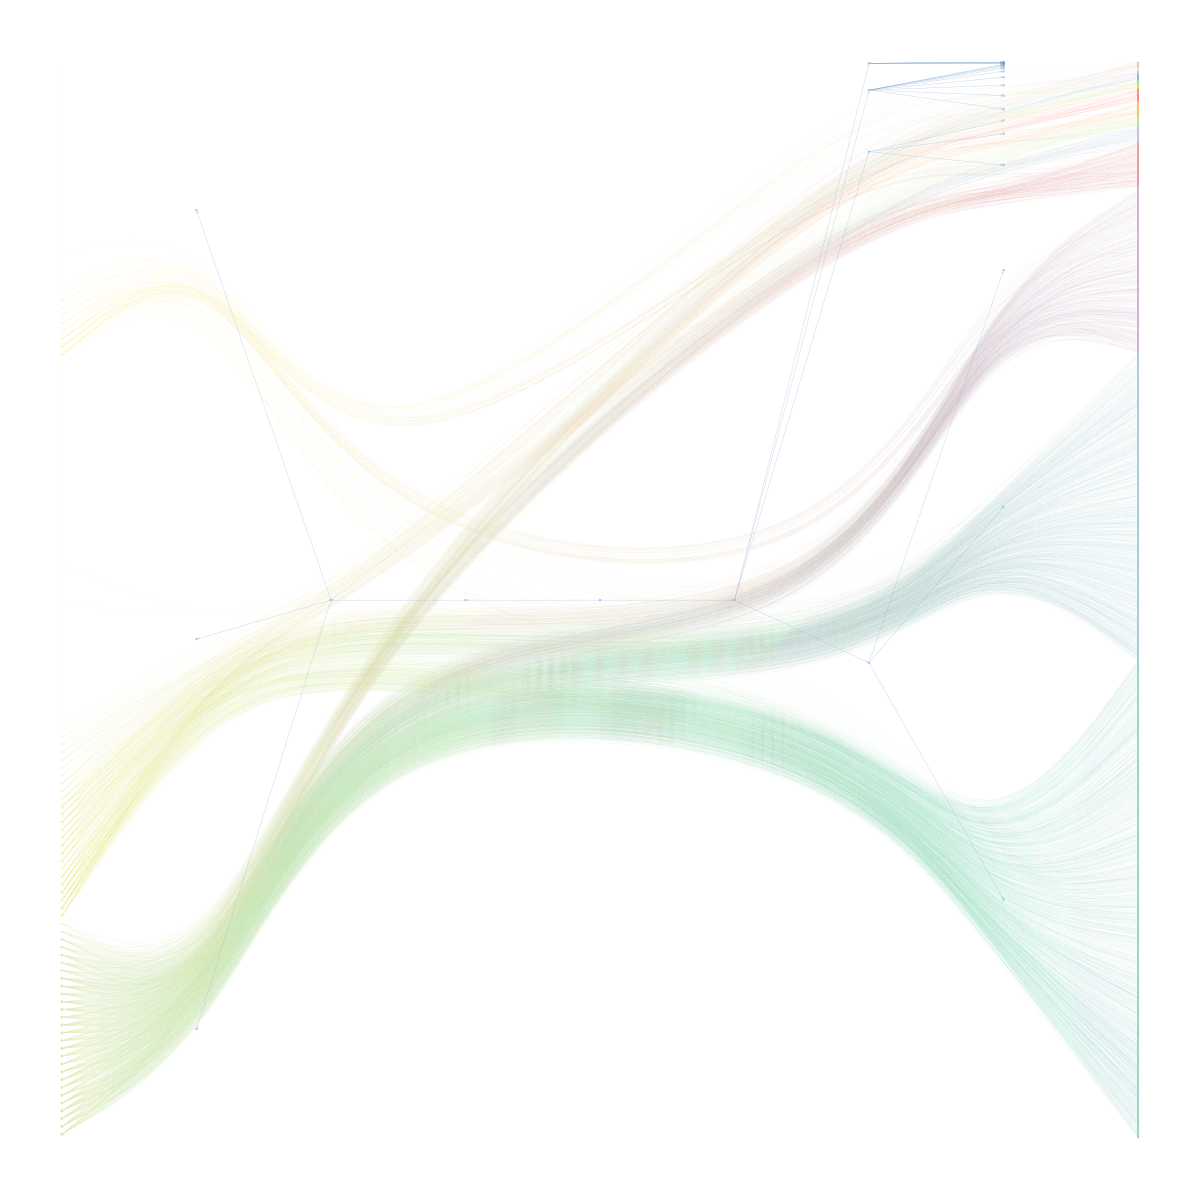

In [36]:
model.plot(nedges=3000)

For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [37]:
model.topics(l=1,n=20)

['I', 'Is', 'It', 'adob', 'air', 'applicationi', 'call', 'databas', 'error', 'execut', 'exist', 'fail', 'first', 'follow', 'gener', 'howev', 'ive', 'look', 'multipl', 'one', 'onli', 'queri', 'remov', 'script', 'seem', 'semicolon', 'sql', 'statement', 'thi', 'use', 'want', 'way', 'written', 'ani', 'apach', 'better', 'branch', 'client', 'explain', 'good', 'merg', 'realli', 'specif', 'subvers', 'tortoisesvn', 'tutori', 'anyon', 'aspnet', 'control', 'creat', 'default', 'dynamicallyi', 'experi', 'file', 'got', 'ha', 'ill', 'membership', 'menu', 'modifi', 'need', 'page', 'permiss', 'properli', 'site', 'sitemap', 'sqlbase', 'standard', 'system', 'tie', 'user', 'view', 'websitemap', 'well', 'work', 'xml', 'N', 'color', 'come', 'distinguish', 'found', 'mani', 'never', 'paramet', 'possibl', 'problem', 'quit', 'solut', 'someth', 'stuck', 'time', '1', 'C', 'So', 'add', 'addchang', 'applic', 'assembl', 'assembliesi', 'backend', 'bonu', 'card', 'class', 'code', 'compil', 'contain', 'deploy', 'especi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:535: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:541: RuntimeWarning: invalid value encountered in true_divide


{0: [('adob', 0.17815788064324145),
  ('It', 0.09681057053396525),
  ('databas', 0.07863501651551644),
  ('gener', 0.061842669999690736),
  ('execut', 0.061079690101174984),
  ('call', 0.05475389655305068),
  ('error', 0.05425115201290164),
  ('first', 0.05116566582913625),
  ('applicationi', 0.04413327671014231),
  ('statement', 0.03555211005617312),
  ('sql', 0.032575243848073844),
  ('exist', 0.027712614173549074),
  ('howev', 0.024917912716306497),
  ('queri', 0.02218525287710932),
  ('remov', 0.020065277588153786),
  ('ive', 0.017746919982530286),
  ('follow', 0.01588227706692876),
  ('air', 0.015031797743570866),
  ('thi', 0.014841524209808535),
  ('script', 0.013124725149974769)]}

In [0]:
model.clusters(l=1,n=5)